<a href="https://colab.research.google.com/github/3srava0/assignment-3/blob/main/Model_Development_with_train_validation_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Day 4: Model Development
# Real Estate Investment Advisor System
print("="*60)
print("MODEL DEVELOPMENT - CLASSIFICATION & REGRESSION")
print("="*60)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    # Classification metrics
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    # Regression metrics
    mean_squared_error, mean_absolute_error, r2_score
)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

print("\n✅ All libraries imported successfully!")


MODEL DEVELOPMENT - CLASSIFICATION & REGRESSION
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ All libraries imported successfully!


In [6]:
# Load dataset with target variables
df = pd.read_csv('/content/drive/MyDrive/assignment-3/data/data_with_targets.csv')

print(f"Dataset loaded: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"\nTarget variables:")
print(f"  - Good_Investment (Classification): {df['Good_Investment'].nunique()} classes")
print(f"  - Future_Price_5Y (Regression): Continuous values")
print(f"\nFirst few rows:")
df.head()


Dataset loaded: (247466, 42)

Columns: 42

Target variables:
  - Good_Investment (Classification): 2 classes
  - Future_Price_5Y (Regression): Continuous values

First few rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Floor_Category,Is_Ground_Floor,Is_High_Floor,ROI_Indicator,Affordability_Index,Parking_Space_Numeric,Future_Price_5Y,City_Median_Price,City_Median_Price_per_SqFt,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,High,0,1,0.752688,103.324895,0,719.618119,258.94,0.09,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,High,0,1,0.595784,27.569092,0,287.283026,261.28,0.10,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,High,0,1,0.382853,25.232015,1,270.047807,252.42,0.09,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,High,0,1,0.840251,54.777453,1,441.224528,255.50,0.09,0
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,Lower,0,0,0.306462,9.480614,0,268.740105,253.90,0.09,1


In [7]:
# Select features for modeling
print("\n" + "="*60)
print("FEATURE SELECTION & PREPROCESSING")
print("="*60)

# Columns to drop
columns_to_drop = [
    'ID',  # Identifier, not useful for prediction
    'Price_in_Lakhs',  # Target variable for regression (we use Future_Price_5Y)
    'Good_Investment',  # Classification target
    'Future_Price_5Y',  # Regression target
    'City_Median_Price',  # Helper column
    'City_Median_Price_per_SqFt'  # Helper column (if exists)
]

# Remove columns that don't exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Separate features and targets
X = df.drop(columns=columns_to_drop)
y_classification = df['Good_Investment']
y_regression = df['Future_Price_5Y']

print(f"\nFeatures shape: {X.shape}")
print(f"Classification target shape: {y_classification.shape}")
print(f"Regression target shape: {y_regression.shape}")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")



FEATURE SELECTION & PREPROCESSING

Features shape: (247466, 36)
Classification target shape: (247466,)
Regression target shape: (247466,)

Categorical columns (14): ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status', 'Age_Category', 'Floor_Category']
Numerical columns (22): ['BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Property_Age', 'SqFt_per_BHK', 'Is_Spacious', 'State_Price_Ratio', 'City_Price_Ratio', 'School_Density_Score', 'Hospital_Density_Score', 'Amenity_Score', 'Is_Ground_Floor', 'Is_High_Floor', 'ROI_Indicator', 'Affordability_Index', 'Parking_Space_Numeric']


In [8]:
# Encode categorical variables
print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

# Create a copy for encoding
X_encoded = X.copy()

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"✅ Encoded: {col} ({X_encoded[col].nunique()} unique values)")

print(f"\nFinal feature set shape: {X_encoded.shape}")
print(f"All features are now numerical: {X_encoded.select_dtypes(include=[np.number]).shape[1]} columns")



ENCODING CATEGORICAL VARIABLES
✅ Encoded: State (20 unique values)
✅ Encoded: City (42 unique values)
✅ Encoded: Locality (500 unique values)
✅ Encoded: Property_Type (3 unique values)
✅ Encoded: Furnished_Status (3 unique values)
✅ Encoded: Public_Transport_Accessibility (3 unique values)
✅ Encoded: Parking_Space (2 unique values)
✅ Encoded: Security (2 unique values)
✅ Encoded: Amenities (325 unique values)
✅ Encoded: Facing (4 unique values)
✅ Encoded: Owner_Type (3 unique values)
✅ Encoded: Availability_Status (2 unique values)
✅ Encoded: Age_Category (4 unique values)
✅ Encoded: Floor_Category (4 unique values)

Final feature set shape: (247466, 36)
All features are now numerical: 36 columns


In [9]:
# Split data: 60% train, 20% validation, 20% test
print("\n" + "="*60)
print("TRAIN/VALIDATION/TEST SPLIT")
print("="*60)

# First split: 80% train+val, 20% test
X_temp, X_test, y_class_temp, y_class_test, y_reg_temp, y_reg_test = train_test_split(
    X_encoded, y_classification, y_regression,
    test_size=0.20,
    random_state=42,
    stratify=y_classification  # Balanced split for classification
)

# Second split: 75% of temp = 60% overall train, 25% of temp = 20% overall validation
X_train, X_val, y_class_train, y_class_val, y_reg_train, y_reg_val = train_test_split(
    X_temp, y_class_temp, y_reg_temp,
    test_size=0.25,  # 0.25 * 0.80 = 0.20 of total
    random_state=42,
    stratify=y_class_temp
)

print(f"\n📊 Data Split Summary:")
print(f"  Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"  Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\n✅ Split complete with stratification")



TRAIN/VALIDATION/TEST SPLIT

📊 Data Split Summary:
  Train set: 148,479 samples (60.0%)
  Validation set: 49,493 samples (20.0%)
  Test set: 49,494 samples (20.0%)

✅ Split complete with stratification


In [10]:
# Scale features for models that need it
print("\n" + "="*60)
print("FEATURE SCALING (StandardScaler)")
print("="*60)

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Features scaled using StandardScaler")
print(f"   Mean: {X_train_scaled.mean().mean():.6f}")
print(f"   Std: {X_train_scaled.std().mean():.6f}")



FEATURE SCALING (StandardScaler)
✅ Features scaled using StandardScaler
   Mean: 0.000000
   Std: 1.000003


In [11]:
# Train Classification Models - OPTIMIZED VERSION
print("\n" + "="*60)
print("TRAINING CLASSIFICATION MODELS (OPTIMIZED)")
print("="*60)

from joblib import Parallel, delayed
import time

# Initialize classification models (optimized parameters)
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=50, max_depth=5),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=50, n_jobs=-1, max_depth=5, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'Naive Bayes': GaussianNB()
}

# Function to train a single model
def train_classification_model(name, model, X_train, X_train_scaled, y_train, X_val, X_val_scaled, y_val):
    start_time = time.time()

    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    training_time = time.time() - start_time

    return name, model, {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    }

# Train models in parallel
print("Training models in parallel...")
start_total = time.time()

results = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_classification_model)(
        name, model, X_train, X_train_scaled, y_class_train,
        X_val, X_val_scaled, y_class_val
    )
    for name, model in classification_models.items()
)

total_time = time.time() - start_total

# Store results
classification_results = {}
trained_classification_models = {}

for name, model, metrics in results:
    classification_results[name] = metrics
    trained_classification_models[name] = model
    print(f"\n✅ {name}")
    print(f"   Accuracy: {metrics['Accuracy']:.4f} | Precision: {metrics['Precision']:.4f} | "
          f"Recall: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f} | ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print(f"   Training Time: {metrics['Training Time (s)']:.2f}s")

print("\n" + "="*60)
print(f"✅ ALL CLASSIFICATION MODELS TRAINED IN {total_time:.2f}s")
print("="*60)



TRAINING CLASSIFICATION MODELS (OPTIMIZED)
Training models in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  2.9min remaining:   57.1s



✅ Logistic Regression
   Accuracy: 0.8996 | Precision: 0.9131 | Recall: 0.9236 | F1: 0.9183 | ROC-AUC: 0.9655
   Training Time: 0.62s

✅ Decision Tree
   Accuracy: 0.9980 | Precision: 0.9987 | Recall: 0.9981 | F1: 0.9984 | ROC-AUC: 0.9986
   Training Time: 5.61s

✅ Random Forest
   Accuracy: 0.9983 | Precision: 0.9988 | Recall: 0.9984 | F1: 0.9986 | ROC-AUC: 0.9999
   Training Time: 24.31s

✅ Gradient Boosting
   Accuracy: 0.9987 | Precision: 0.9989 | Recall: 0.9990 | F1: 0.9989 | ROC-AUC: 1.0000
   Training Time: 162.99s

✅ XGBoost
   Accuracy: 0.9991 | Precision: 0.9990 | Recall: 0.9995 | F1: 0.9993 | ROC-AUC: 1.0000
   Training Time: 3.38s

✅ AdaBoost
   Accuracy: 0.9947 | Precision: 0.9934 | Recall: 0.9980 | F1: 0.9957 | ROC-AUC: 0.9993
   Training Time: 43.31s

✅ K-Nearest Neighbors
   Accuracy: 0.9054 | Precision: 0.9112 | Recall: 0.9365 | F1: 0.9237 | ROC-AUC: 0.9621
   Training Time: 156.14s

✅ Naive Bayes
   Accuracy: 0.8520 | Precision: 0.8495 | Recall: 0.9210 | F1: 0.8838 |

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  3.8min finished



CLASSIFICATION MODELS - VALIDATION RESULTS

                      Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
XGBoost                0.9991     0.9990  0.9995    0.9993   1.0000   
Gradient Boosting      0.9987     0.9989  0.9990    0.9989   1.0000   
Random Forest          0.9983     0.9988  0.9984    0.9986   0.9999   
AdaBoost               0.9947     0.9934  0.9980    0.9957   0.9993   
Decision Tree          0.9980     0.9987  0.9981    0.9984   0.9986   
Logistic Regression    0.8996     0.9131  0.9236    0.9183   0.9655   
K-Nearest Neighbors    0.9054     0.9112  0.9365    0.9237   0.9621   
Naive Bayes            0.8520     0.8495  0.9210    0.8838   0.9236   

                     Training Time (s)  
XGBoost                         3.3796  
Gradient Boosting             162.9874  
Random Forest                  24.3067  
AdaBoost                       43.3138  
Decision Tree                   5.6099  
Logistic Regression             0.6214  
K-Nearest Neighbors        

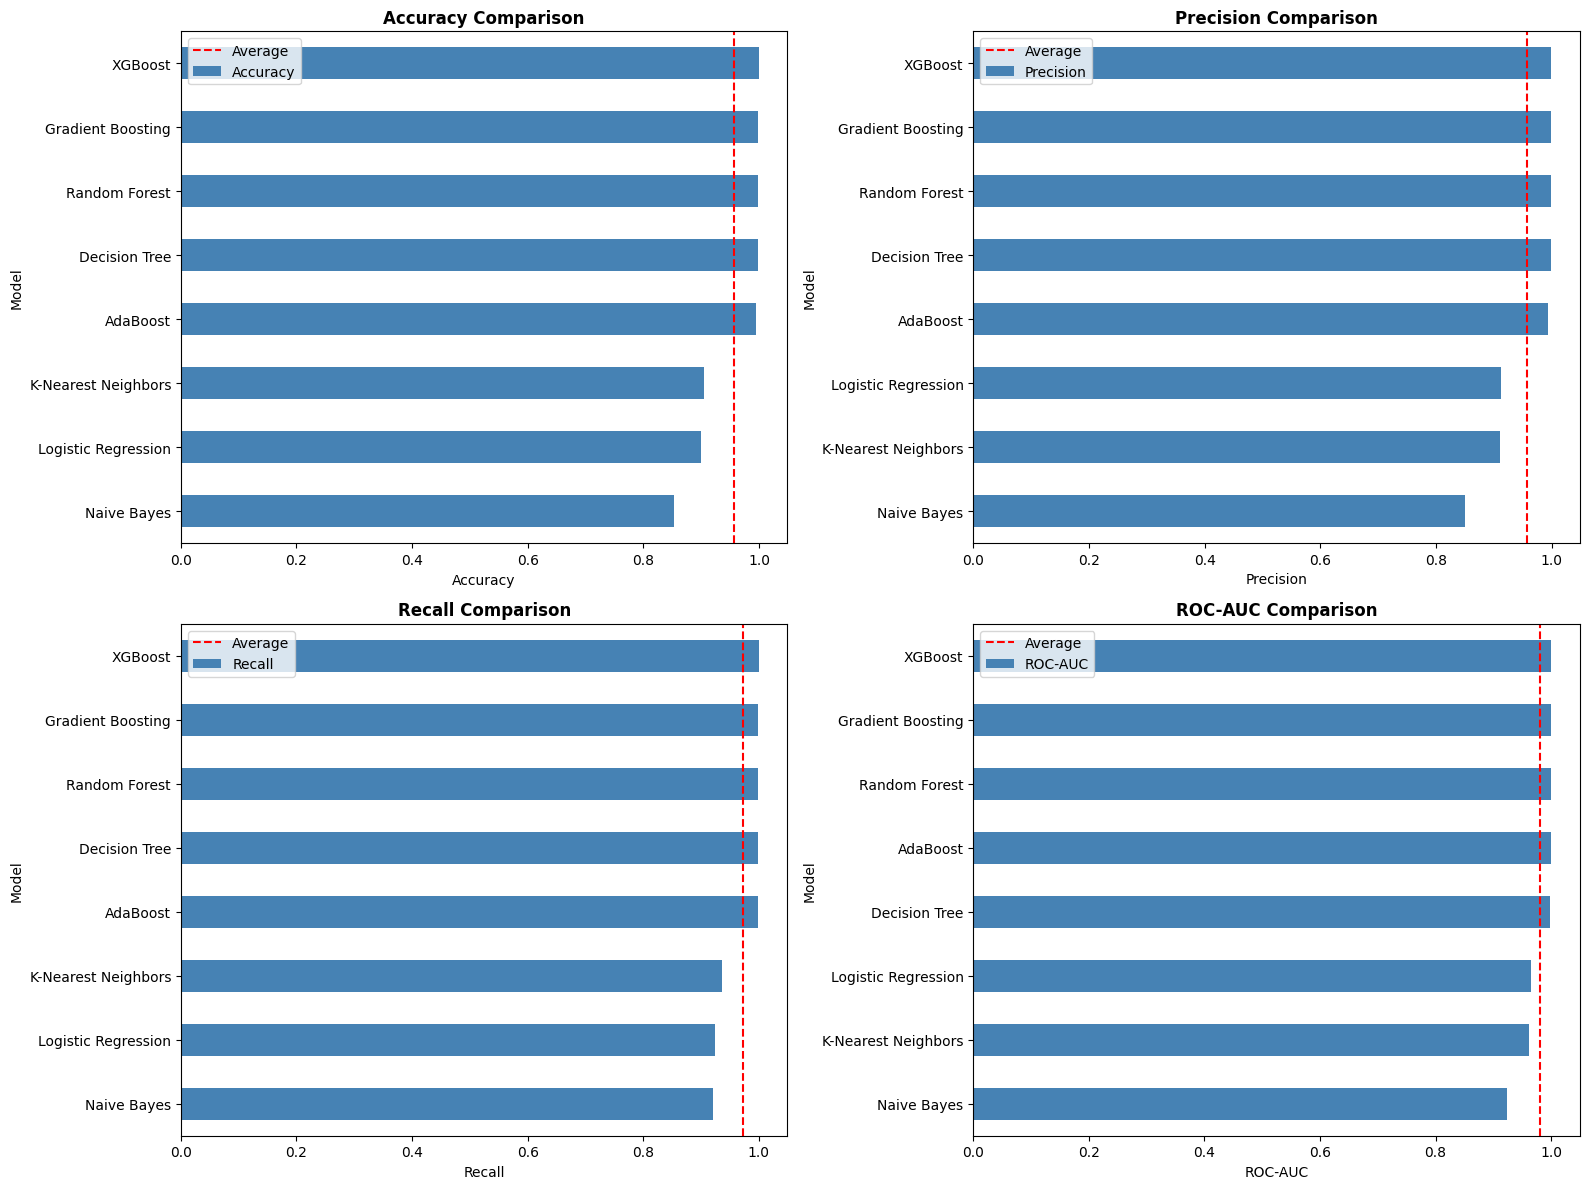

In [12]:
# Display classification results
print("\n" + "="*60)
print("CLASSIFICATION MODELS - VALIDATION RESULTS")
print("="*60)

results_df = pd.DataFrame(classification_results).T
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n", results_df.round(4))

# Find best model
best_model_name = results_df['ROC-AUC'].idxmax()
best_score = results_df.loc[best_model_name, 'ROC-AUC']

print(f"\n🏆 Best Classification Model: {best_model_name}")
print(f"   ROC-AUC Score: {best_score:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel(metric, fontsize=10)
    ax.set_ylabel('Model', fontsize=10)
    ax.axvline(x=results_df[metric].mean(), color='red', linestyle='--', label='Average')
    ax.legend()

plt.tight_layout()
plt.show()


In [14]:
# Train Regression Models - OPTIMIZED VERSION
print("\n" + "="*60)
print("TRAINING REGRESSION MODELS (OPTIMIZED)")
print("="*60)

# Initialize regression models (optimized parameters)
regression_models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Ridge Regression': Ridge(random_state=42, alpha=1.0),
    'Lasso Regression': Lasso(random_state=42, alpha=1.0, max_iter=500),
    'ElasticNet': ElasticNet(random_state=42, alpha=1.0, max_iter=500),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=50, max_depth=5),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=50, n_jobs=-1, max_depth=5),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}

# Function to train a single regression model
def train_regression_model(name, model, X_train, X_train_scaled, y_train, X_val, X_val_scaled, y_val):
    start_time = time.time()

    # Use scaled data for linear models and KNN
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    training_time = time.time() - start_time

    return name, model, {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Training Time (s)': training_time
    }

# Train models in parallel
print("Training models in parallel...")
start_total = time.time()

results_reg = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_regression_model)(
        name, model, X_train, X_train_scaled, y_reg_train,
        X_val, X_val_scaled, y_reg_val
    )
    for name, model in regression_models.items()
)

total_time_reg = time.time() - start_total

# Store results
regression_results = {}
trained_regression_models = {}

for name, model, metrics in results_reg:
    regression_results[name] = metrics
    trained_regression_models[name] = model
    print(f"\n✅ {name}")
    print(f"   MAE: {metrics['MAE']:.4f} | RMSE: {metrics['RMSE']:.4f} | R²: {metrics['R²']:.4f}")
    print(f"   Training Time: {metrics['Training Time (s)']:.2f}s")

print("\n" + "="*60)
print(f"✅ ALL REGRESSION MODELS TRAINED IN {total_time_reg:.2f}s")
print("="*60)



TRAINING REGRESSION MODELS (OPTIMIZED)
Training models in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s



✅ Linear Regression
   MAE: 1.5655 | RMSE: 2.0265 | R²: 0.9999
   Training Time: 0.50s

✅ Ridge Regression
   MAE: 1.5694 | RMSE: 2.0284 | R²: 0.9999
   Training Time: 0.19s

✅ Lasso Regression
   MAE: 1.9565 | RMSE: 2.4896 | R²: 0.9999
   Training Time: 1.52s

✅ ElasticNet
   MAE: 36.5199 | RMSE: 42.7288 | R²: 0.9571
   Training Time: 0.62s

✅ Decision Tree
   MAE: 1.5098 | RMSE: 2.0066 | R²: 0.9999
   Training Time: 12.68s

✅ Random Forest
   MAE: 0.3890 | RMSE: 0.5339 | R²: 1.0000
   Training Time: 252.88s

✅ Gradient Boosting
   MAE: 1.5724 | RMSE: 1.9547 | R²: 0.9999
   Training Time: 236.64s

✅ XGBoost
   MAE: 0.9819 | RMSE: 1.2213 | R²: 1.0000
   Training Time: 2.78s

✅ AdaBoost
   MAE: 22.2223 | RMSE: 25.7170 | R²: 0.9845
   Training Time: 17.52s

✅ K-Nearest Neighbors
   MAE: 52.9321 | RMSE: 65.4390 | R²: 0.8993
   Training Time: 62.10s

✅ ALL REGRESSION MODELS TRAINED IN 318.36s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.3min finished



REGRESSION MODELS - VALIDATION RESULTS

                          MAE        MSE     RMSE      R²  Training Time (s)
Random Forest         0.3890     0.2851   0.5339  1.0000           252.8822
XGBoost               0.9819     1.4915   1.2213  1.0000             2.7815
Gradient Boosting     1.5724     3.8209   1.9547  0.9999           236.6416
Decision Tree         1.5098     4.0266   2.0066  0.9999            12.6828
Linear Regression     1.5655     4.1066   2.0265  0.9999             0.4955
Ridge Regression      1.5694     4.1142   2.0284  0.9999             0.1872
Lasso Regression      1.9565     6.1981   2.4896  0.9999             1.5230
AdaBoost             22.2223   661.3636  25.7170  0.9845            17.5247
ElasticNet           36.5199  1825.7471  42.7288  0.9571             0.6172
K-Nearest Neighbors  52.9321  4282.2573  65.4390  0.8993            62.1030

🏆 Best Regression Model: Random Forest
   R² Score: 1.0000
   RMSE: 0.5339


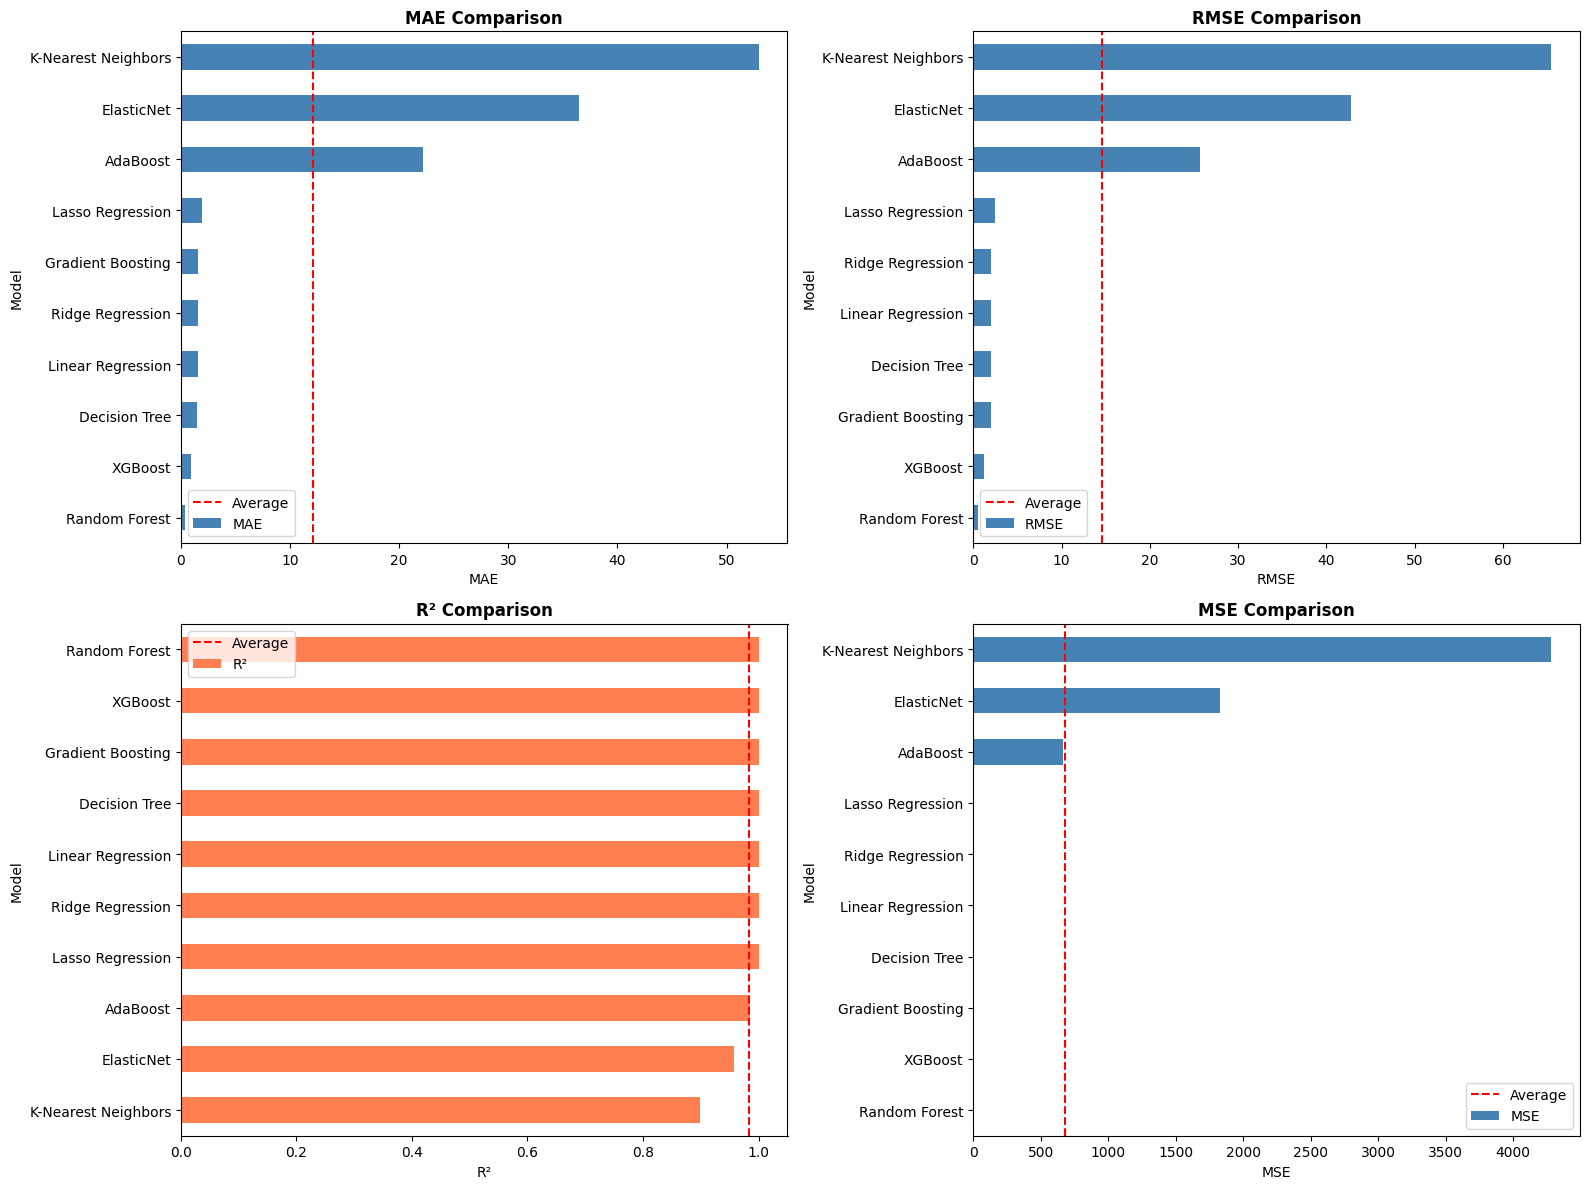

In [15]:
# Display regression results
print("\n" + "="*60)
print("REGRESSION MODELS - VALIDATION RESULTS")
print("="*60)

results_df_reg = pd.DataFrame(regression_results).T
results_df_reg = results_df_reg.sort_values('R²', ascending=False)

print("\n", results_df_reg.round(4))

# Find best model
best_model_name_reg = results_df_reg['R²'].idxmax()
best_score_reg = results_df_reg.loc[best_model_name_reg, 'R²']

print(f"\n🏆 Best Regression Model: {best_model_name_reg}")
print(f"   R² Score: {best_score_reg:.4f}")
print(f"   RMSE: {results_df_reg.loc[best_model_name_reg, 'RMSE']:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_reg = ['MAE', 'RMSE', 'R²', 'MSE']
for idx, metric in enumerate(metrics_reg):
    ax = axes[idx // 2, idx % 2]
    if metric == 'R²':
        results_df_reg[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='coral')
    else:
        results_df_reg[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel(metric, fontsize=10)
    ax.set_ylabel('Model', fontsize=10)
    ax.axvline(x=results_df_reg[metric].mean(), color='red', linestyle='--', label='Average')
    ax.legend()

plt.tight_layout()
plt.show()



CONFUSION MATRIX - XGBoost


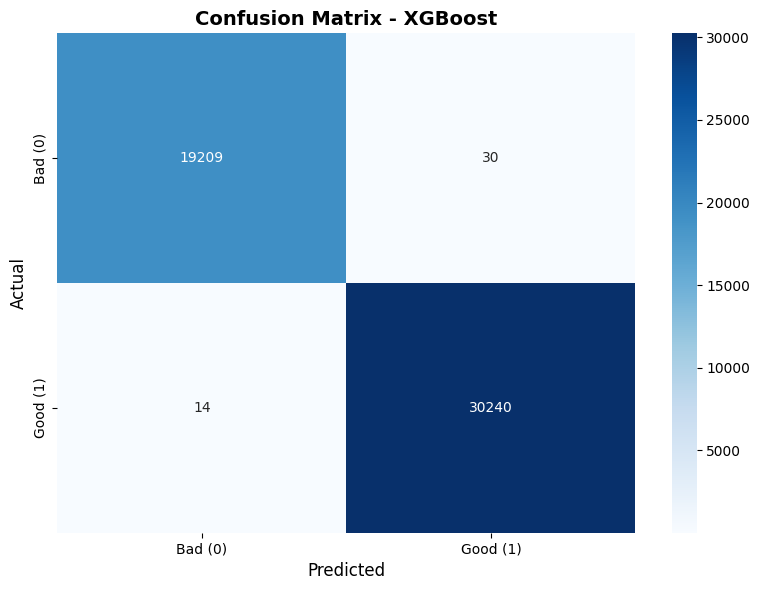


Classification Report:
              precision    recall  f1-score   support

     Bad (0)       1.00      1.00      1.00     19239
    Good (1)       1.00      1.00      1.00     30254

    accuracy                           1.00     49493
   macro avg       1.00      1.00      1.00     49493
weighted avg       1.00      1.00      1.00     49493



In [16]:
# Confusion Matrix for Best Classification Model
print("\n" + "="*60)
print(f"CONFUSION MATRIX - {best_model_name}")
print("="*60)

best_clf_model = trained_classification_models[best_model_name]

# Get predictions
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    y_val_pred_best = best_clf_model.predict(X_val_scaled)
else:
    y_val_pred_best = best_clf_model.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_class_val, y_val_pred_best)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad (0)', 'Good (1)'],
            yticklabels=['Bad (0)', 'Good (1)'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_class_val, y_val_pred_best, target_names=['Bad (0)', 'Good (1)']))



PREDICTION ANALYSIS - Random Forest


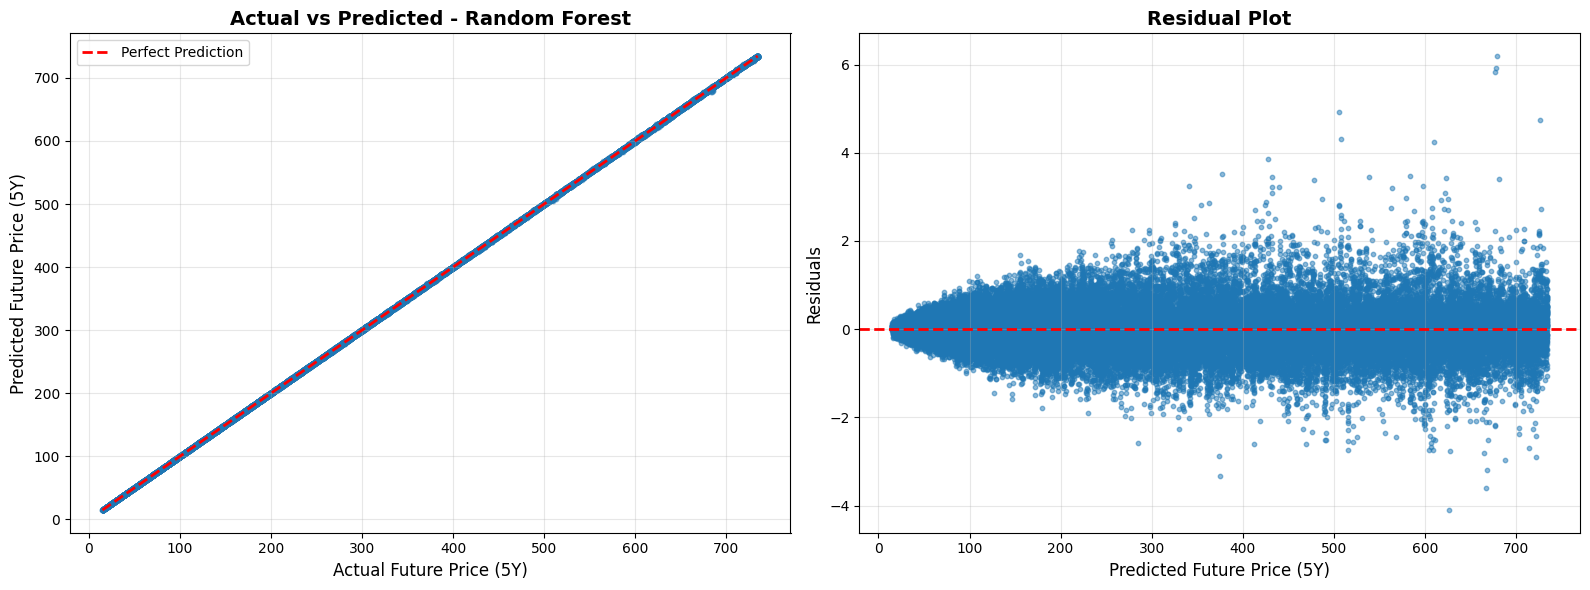


Residual Statistics:
  Mean: -0.0003
  Std Dev: 0.5339
  Min: -4.1012
  Max: 6.1946


In [17]:
# Prediction vs Actual for Best Regression Model
print("\n" + "="*60)
print(f"PREDICTION ANALYSIS - {best_model_name_reg}")
print("="*60)

best_reg_model = trained_regression_models[best_model_name_reg]

# Get predictions
if best_model_name_reg in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'K-Nearest Neighbors']:
    y_val_pred_best_reg = best_reg_model.predict(X_val_scaled)
else:
    y_val_pred_best_reg = best_reg_model.predict(X_val)

# Plot predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_reg_val, y_val_pred_best_reg, alpha=0.5, s=10)
axes[0].plot([y_reg_val.min(), y_reg_val.max()],
             [y_reg_val.min(), y_reg_val.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Future Price (5Y)', fontsize=12)
axes[0].set_ylabel('Predicted Future Price (5Y)', fontsize=12)
axes[0].set_title(f'Actual vs Predicted - {best_model_name_reg}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_reg_val - y_val_pred_best_reg
axes[1].scatter(y_val_pred_best_reg, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Future Price (5Y)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.4f}")
print(f"  Std Dev: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")


In [18]:
# Save best models
import pickle

print("\n" + "="*60)
print("SAVING BEST MODELS")
print("="*60)

# Create models directory
import os
models_dir = '/content/drive/MyDrive/assignment-3/models'
os.makedirs(models_dir, exist_ok=True)

# Save best classification model
clf_model_path = f'{models_dir}/best_classification_model.pkl'
with open(clf_model_path, 'wb') as f:
    pickle.dump(best_clf_model, f)
print(f"\n✅ Best Classification Model saved: {best_model_name}")
print(f"   Path: {clf_model_path}")

# Save best regression model
reg_model_path = f'{models_dir}/best_regression_model.pkl'
with open(reg_model_path, 'wb') as f:
    pickle.dump(best_reg_model, f)
print(f"\n✅ Best Regression Model saved: {best_model_name_reg}")
print(f"   Path: {reg_model_path}")

# Save scaler
scaler_path = f'{models_dir}/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"\n✅ Scaler saved")
print(f"   Path: {scaler_path}")

# Save label encoders
encoders_path = f'{models_dir}/label_encoders.pkl'
with open(encoders_path, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"\n✅ Label Encoders saved")
print(f"   Path: {encoders_path}")



SAVING BEST MODELS

✅ Best Classification Model saved: XGBoost
   Path: /content/drive/MyDrive/assignment-3/models/best_classification_model.pkl

✅ Best Regression Model saved: Random Forest
   Path: /content/drive/MyDrive/assignment-3/models/best_regression_model.pkl

✅ Scaler saved
   Path: /content/drive/MyDrive/assignment-3/models/scaler.pkl

✅ Label Encoders saved
   Path: /content/drive/MyDrive/assignment-3/models/label_encoders.pkl


In [19]:
# Final summary
print("\n" + "="*60)
print("MODEL DEVELOPMENT SUMMARY")
print("="*60)

print("\n📊 CLASSIFICATION MODELS:")
print(f"   Total models trained: {len(classification_models)}")
print(f"   Best model: {best_model_name}")
print(f"   Best ROC-AUC: {best_score:.4f}")

print("\n📊 REGRESSION MODELS:")
print(f"   Total models trained: {len(regression_models)}")
print(f"   Best model: {best_model_name_reg}")
print(f"   Best R²: {best_score_reg:.4f}")

print("\n" + "="*60)
print("✅ MODEL DEVELOPMENT COMPLETE!")
print("="*60)
print("\nNext Steps:")
print("  1. MLflow Integration for experiment tracking")
print("  2. Hyperparameter tuning on best models")
print("  3. Final evaluation on test set")
print("  4. Streamlit app development")



MODEL DEVELOPMENT SUMMARY

📊 CLASSIFICATION MODELS:
   Total models trained: 8
   Best model: XGBoost
   Best ROC-AUC: 1.0000

📊 REGRESSION MODELS:
   Total models trained: 10
   Best model: Random Forest
   Best R²: 1.0000

✅ MODEL DEVELOPMENT COMPLETE!

Next Steps:
  1. MLflow Integration for experiment tracking
  2. Hyperparameter tuning on best models
  3. Final evaluation on test set
  4. Streamlit app development
